# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS17

# Assignment 5 - Jacobians

## Team Members : Vajra Ganeshkumar, Jeeveswaran Kishaan

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import sympy as sp

            
from sympy import sin, cos, Matrix
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython

## Velocity kinematics [40 points]

The following figure shows a robot arm with three rotational joints and two links:

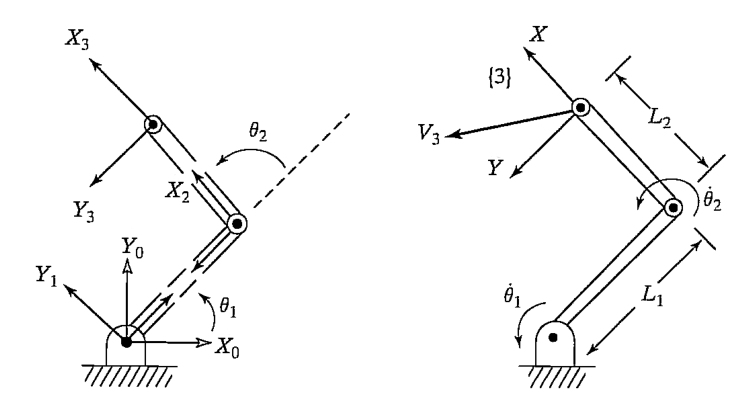

In [2]:
IPython.core.display.Image(r"images/robot_arm.png")

The left part of the above figure shows four different frames attached to the arm of the robot, namely frames $0$, $1$, $2$, and $3$. $X_0$ and $Y_0$ describe the base frame, $Y_1$ is the unit vector pointing to the direction of the first link's $Y$ axis, $X_2$ denotes the direction of the second link's $X$ axis, and finally, $X_3$ and $Y_3$ specify the orientation of the end effector's frame, which you can assume to be fixed.

### Transformations [5 points]

#### Specify the transformation matrices between frame 0 and frame 1, between frame 1 and frame 2, and finally the transformation between frame 2 and frame 3.

### Answer####

Transformation matrix between frame 0 and frame 1

 $$^0_1T(\theta_1) = {\begin{pmatrix}
cos(\theta_1) & -sin(\theta_1)  & 0 & 0 \\ 
 sin(\theta_1)&  cos(\theta_1) & 0 & 0\\ 
 0 & 0& 1&0 \\
 0 & 0  &0 & 1 
\end{pmatrix}}{}$$
<br>
This corresponds to a rotation by an angle $\theta_1$  <br>
<br>
Transformation matrix between frame 1 to frame 2

$$^1_2 T(\theta_2) = {\begin{pmatrix}
cos(\theta_2) & -sin(\theta_2) & 0 & L_1 \\ 
 sin(\theta_2)&  cos(\theta_2) & 0 & 0\\
 0 & 0 & 1&0\\
 0 & 0 & 0 &1 
\end{pmatrix}}{}$$ <br>
<br>
This corresponds to a rotation by an angle $\theta_2$ and a translation by a distance $L_1$ , where $L_1$ is the length of the first link.

Transformation matrix between frame 2 to frame 3

$$ ^2_3 T =\begin{pmatrix}
1 &0  & 0& L_2 \\ 
 0&1  & 0&0 \\ 
 0&0  & 1&0 \\
 0&0&0&1\\ 
\end{pmatrix}$$
<br>
where $L_2$ is the length of the second link


### Angular velocities [35 points]

Assuming angular velocities are expressed using a common frame, they can be added as vectors. Now, given link number $i$, its velocity will be whatever the velocity of link $i-1$ was, plus whatever velocities were added by joint $i$. Another way to think of this is the following: before you can add the angular velocities, you have to transform one of the velocities to the coordinate frame of the other.

Before proceeding with the assignment, please read [this](resources/velocity_kinematics.pdf) chapter.

#### Specify the term to compute the angular velocity $\omega_i$ in terms of $\omega_{i-1}$ with respect to frame $i-1$. Remember that angular velocity is the derivative of a joint value $\theta$ with respect to a rotation axis. [13 points]

#### Answer ####

A manipulator is a chain of bodies, each one capable of motion relative to its neighbors. Because of this structure, we can compute the velocity of each link in order, starting from the base. The velocity of link $i$ will be that of link $i-1$, plus whatever new new velocity components were added by joint $i$.

Each link of the mechanism as a rigid body with linear and angular velocity vectors describing its motion. Further, we will express these velocities with respect to the link frame itself rather than with respect to the base coordinate system. Rotational velocities can be added when both $\omega$ vectors are written with respect to the same frame. Therefore, the angular velocity of link $i$ is the same as that of link $i - 1$ plus a new component caused by rotational velocity at joint $i$. This can be written in terms of frame ${i-1}$ as 

$$ ^{i-1}\omega_{i} =  {^{i-1}\omega_{i-1}} + {^i_{i} R \dot{\theta}_i ^{i}\hat{Z}_{i}} $$

Note that 

$$ {\dot{\theta}_{i} {^{i} \hat{Z}_{i}}} = {^{i} \begin{pmatrix}  0 \\ 0 \\ {\dot{\theta}_{i}}  \\ \end{pmatrix}} .... (1) $$

We made use of the rotation matrix relating frames ${i-1}$ and ${i}$ in order to represent the added rotational component due to motion at the joint in frame ${i-1}$. The rotation matrix rotates the axis of rotation of joint $i$ into its description in frame ${i-1}$ so that the two components of angular velocity can be added.

By premultiplying both sides of equation (1) by $^{i}_{i-1} R $ we can find the description of the angular velocity of link $i$ with respect to frame ${i}$:

$$ {^{i}w_{i}} = {_{i-1}^{i} R ^{i-1} w_{i-1}} + {\dot{\theta}_{i}} {^{i}\hat{Z}_{i}} $$  

The corresponding relationships for the case that joint $i$ is prismatic is

$$ {^{i}w_{i}} = {^{i}_{i-1} R ^{i-1} w_{i-1}} $$

#### Reference ####
* Introduction to Robotics Mechanics and Control by John J.Craig
* VELOCITY KINEMATICS – THE MANIPULATOR JACOBIAN 

#### Specify the Jacobian matrix that relates the velocity of the end effector relative to the joint angles of the robotic arm. [12 points]

#### Answer  ####

Jacobian matrices relate the linear and angular velocity of the the end effector to the joint angles of the robotic arm,<br>

To define the current position of the robotic arm, we have 2 conditions :

* The set of joint angles by considering an n link manipulator with joint variables $q_{1},q_{2},......q_{n}$,where n is the number of links

* The end-effector position and orientation which is given by

$$^{0}T_{n}(q) = \begin{bmatrix} ^{0}R_{n}(q) & ^{0}O_{n}(q)\\ 0 & 1\\ \end{bmatrix} $$ <br>

which denotes the transformation from the end-effector frame to the base frame. As the robot moves about, both the joint variables $q_{i}$ and the end-effector position $^{0}O_{n}$ and orientation $^{0}R_{n}$will be functions of time.

Let us consider the angular velocity to be $\omega^{0}_{n}$ of the end effector and let <br>

$$ v^{0}_{n} =  \dot O^{0}_{n}$$ which gives the linear velocity of the end effector where

<br>$$v_{n} = J_{v}\dot q$$

<br>$$\omega_{n} = J_{\omega}\dot q$$ <br>

where $J_{v}$ and $J_{\omega}$ are given by $3 \times n$ matrices.

We can write this together as ,
$$ \begin{bmatrix} v^0_n\\ \omega^0_n \end{bmatrix} = J^0_n \dot{q}$$

where $ J^0_n$ is given by 

 $$ J^0_n = \begin{bmatrix} J_v\\ J_\omega \end{bmatrix} $$
 
the above matrix is called the Manipulator Jacobian and it is a 6 x n matrix.

#### Angular Velocity ####
**$$\omega_{n} = J_{\omega}\dot q$$** <br>
* Angular velocity for the prismatic joint is **0**
* Angular velocity for revolute joint is **$\dot{q}$k** ,
where q is the joint variable and k is the unit vector along the axis of rotation

#### Linear Velocity ####
**$$v_{n} = J_{v}\dot q$$**
* Linear Velocity for the translation joint is given by **$\dot{q}$k**, where q is the joint variable and k is the unit vector along the axis of translation

* Linear velocity for the revolute joint is given by **($\dot{q}$k *r)**, where q is the joint variable, k is the unit vector along the axis of translation and r is the length of the link
#### Reference ####
* Introduction to Robotics Mechanics and Control by John J.Craig
* VELOCITY KINEMATICS – THE MANIPULATOR JACOBIAN 

#### Does the Jacobian have an inverse? If so, is the matrix *always* invertible? What is the physical meaning of the matrix inverse? [5 points]

#### write your answer here ####

* Yes, Jacobian matrix has an inverse
<br>
* The Matrix is invertible only when the determinant of the Jacobian is not equal to zero. Which means, the Jacobian has full rank and all of its columns and rows are independent to each other. 
<br>
* The physical meaning of Jacobian Matrix inverse is that it maps the end effector velocities to the joint velocities. The Jacobian matrix has to be invertible and be of full rank for the bounded end-effector velocities to be able to safely mapp back to bounded joint velocities. 


#### Does the Jacobian always have full rank? How does the rank of the Jacobian affect the velocity mapping? [5 points]

#### answer  ####

No, Jacobian doesn't always have a full rank. There are some configurations for which the rank of Jacobian decreases. Such configurations are called as singularities or singular configurations. Two or more columns of the Jacobian matrix become dependent on each other and thus it loses its full rank status.

Singularities represent configurations from which certain directions of motion may be unattainable. It affects the velocity mapping by making the joint velocities unbounded when using bounded end-effector velocities at singularities. Near singularities there will not exist a unique solution to the inverse kinematics problem. In such cases there may be no solution or there may be infinitely many solutions.

#### Reference ####
* VELOCITY KINEMATICS – THE MANIPULATOR JACOBIAN 

## Finding joint velocities for a given Cartesian velocity profile [40 points]

This exercise is a continuation of the previous one, such that you will have to use just the linear part of the Jacobian to derive joint velocities for a given Cartesian velocity of the end-effector.

First, write down the equations that relate the Cartesian positions $(x,y)$ of the tip of link 1 and the end-effector (the tip of link 2) to the configuration space variables $\theta_1$ and $\theta_2$.

#### write the equations here ####

* The position $(x_1, y_1)$ of the tip of the first link can be determined as

\begin{align*}
    x_1 &= L_1\cos(\theta_1) \\
    y_1 &= L_1\sin(\theta_1)
\end{align*}

Given $\dot{\theta}_1$, namely the rotational speed of the first link, we can calculate the Cartesian velocity $(\dot{x}_1, \dot{y}_1)$ of the tip of the link as

\begin{align*}
    \dot{x}_1 &= -L_1\sin(\theta_1)\dot{\theta}_1 \\
    \dot{y}_1 &= L_1\cos(\theta_1)\dot{\theta}_1
\end{align*}

* The position $(x_2, y_2)$ of the tip of the second link i.e, end effector is given as

\begin{align*}
    x_2 &= L_1\cos(\theta_1) + L_2\cos(\theta_1 + \theta_2) \\
    y_2 &= L_1\sin(\theta_1) + L_2\sin(\theta_1 + \theta_2)
\end{align*}

Given $\dot{\theta}_1$ and $\dot{\theta}_2$, namely the rotational speeds of the two links, we can find the Cartesian velocity of the end effector as

\begin{align*}
    \dot{x}_2 &= \frac{\partial x_2}{\partial \theta_1}\dot{\theta}_1 + \frac{\partial x_2}{\partial \theta_2}\dot{\theta}_2 \\
    \dot{y}_2 &= \frac{\partial y_2}{\partial \theta_1}\dot{\theta}_1 + \frac{\partial y_2}{\partial \theta_2}\dot{\theta}_2
\end{align*}

which is equal to

\begin{align*}
    \dot{x}_2 &= -[L_1\sin(\theta_1) + L_2\sin(\theta_1 + \theta_2)]\dot{\theta}_1 - L_2\sin(\theta_1 + \theta_2) \dot{\theta}_2 \\
    \dot{y}_2 &= [L_1\cos(\theta_1) + L_2\cos(\theta_1 + \theta_2)]\dot{\theta}_1 + L_2\cos(\theta_1 + \theta_2) \dot{\theta}_2
\end{align*}

Now that you have the equations, you need to write some code for calculating the inverse kinematics problem for the given manipulator. To make the problem concrete, we will use $\theta_1 = \theta_2 = \frac{\pi}{4} \frac{rad}{s}$ as the starting position and will set the desired Cartesian velocities as $\frac{dx}{dt} = 0.01 \frac{m}{s}$, $\frac{dy}{dt} = 0.0 \frac{m}{s}$. We'll also assume a length of 1.0 m for both links.

Let's go step by step. First, use `sympy` to calculate the Jacobian that relates the Cartesian velocities of the end-effector to the joint velocities.

In [3]:
### given values; don't change these ###

# link lengths
L1 = 1.0
L2 = 1.0

# initial joint values
theta1_initial = np.pi / 4.
theta2_initial = np.pi / 4.

# desired Cartesian velocity of link 2
des_vel = np.array([[0.01], [0.]])

In [4]:
### populate the equations ###

theta1, theta2 = sp.symbols('theta1, theta2')

# Equations for the end-effector position
# (eq1 = x position, eq2 = y position)
eq1 =  L1 *sp.cos(theta1) + L2 *sp.cos(theta1+theta2)
eq2 =  L1 *sp.sin(theta1) + L2 *sp.sin(theta1+theta2)

# Equations for link 1 tip position
# (eq3 = x position, eq4 = y position)
eq3 = L1 *sp.cos(theta1)
eq4 = L1 *sp.sin(theta1)  

#printing the position of the end effector
print 'Position of end effector'
print 'x = ',eq1
print 'y = ',eq2
#printing the position of the first link's tip
print 'Position of link 1'
print 'x1 = ',eq3
print 'y1 = ',eq4

Position of end effector
x =  1.0*cos(theta1) + 1.0*cos(theta1 + theta2)
y =  1.0*sin(theta1) + 1.0*sin(theta1 + theta2)
Position of link 1
x1 =  1.0*cos(theta1)
y1 =  1.0*sin(theta1)


In [5]:
### calculate the symbolic Jacobian ###
x_1 = Matrix([eq1, eq2])
# Using the sympy to calculate the Jacobian matrix
J_1 = x_1.jacobian([theta1, theta2])
J_1
### Jacobian calculation ends here ###

Matrix([
[-1.0*sin(theta1) - 1.0*sin(theta1 + theta2), -1.0*sin(theta1 + theta2)],
[ 1.0*cos(theta1) + 1.0*cos(theta1 + theta2),  1.0*cos(theta1 + theta2)]])

Now, solve the inverse kinematics problem, i.e. calculate the joint velocities using the Jacobian and update the joint angles based on those. Iterate 10 times and plot the positions of the two end-effectors and the links. Your output should look similar to the plot below.

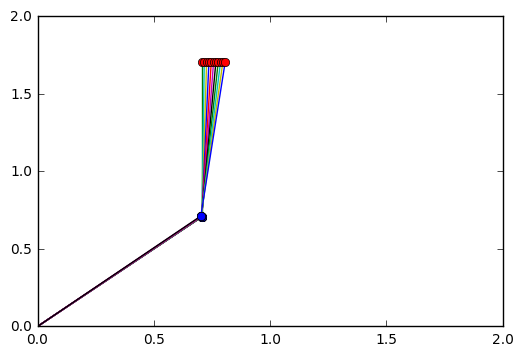

In [6]:
IPython.core.display.Image(r"images/joint_positions.png")

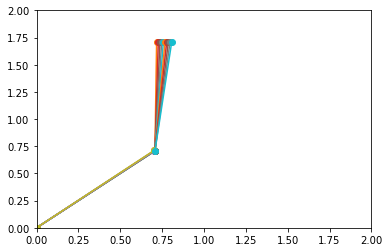

In [7]:
### solve the inverse kinematics problem
### and plot the obtained positions of the tips

# List to hold the new theta values for each iteration
theta1_list = []
theta2_list = []

# List to hold the new x and y values for each iteration
newx2_list = []
newy2_list = []

# List to hold the new x and y values for each iteration
newx1_list = []
newy1_list = []

# Calculating the inverse matrix of Jacobian to calculate the joint angles from the end effector values
J_inv = J_1.inv()

theta1_list.append(theta1_initial)
theta2_list.append(theta2_initial)
cur_theta1 = theta1_initial
cur_theta2 = theta2_initial

for i in range(10):
    # iterating for 10 times
    # Calculating the new Jacobian inverse matrix
    m = J_inv.evalf(subs={theta1: cur_theta1, theta2:cur_theta2})
    # Calculating the new theta values using the updated inverse Jacobian
    new_t = m.dot(des_vel)
    # Updating the new theta values
    cur_theta1 += new_t[0]
    cur_theta2 += new_t[1]
    # Appending the theta values to the list
    theta1_list.append(cur_theta1)
    theta2_list.append(cur_theta2)
    # Appending the new end effector positions from the newly calculated angles
    newx2_list.append(eq1.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    newy2_list.append(eq2.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    # Appending the new link1 positions from the newly calculated angles
    newx1_list.append(eq3.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    newy1_list.append(eq4.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    # Plotting the end effector 
    plt.plot([0,newx1_list[i]], [0,newy1_list[i]], '-',marker = 'o')
    plt.plot([0.707106781186548,newx2_list[i]], [0.707106781186548,newy2_list[i]], '-',marker = 'o')
    

plt.xlim(0,2)
plt.ylim(0,2)
plt.show()    

Finally, increase the number of iterations to 50 and repeat the inverse kinematics solution. Explain why the joints seem to jump around. At what point does the jump happen and what can you say about the Jacobian at this point?

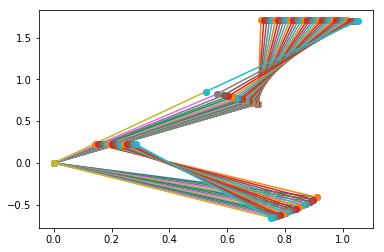

In [10]:
### repeat the inverse kinematics solution,
### but increase the number of iterations

# List to hold the new theta values for each iteration
theta1_list = []
theta2_list = []

# List to hold the new x and y values of end effector for each iteration
newx2_list = []
newy2_list = []

# List to hold the new x and y values of joint 1 for each iteration
newx1_list = []
newy1_list = []

# Calculating the inverse matrix of Jacobian to calculate the joint angles from the end effector values
J_inv = J_1.inv()

theta1_list.append(theta1_initial)
theta2_list.append(theta2_initial)

cur_theta1 = theta1_initial
cur_theta2 = theta2_initial

for i in range(50):
    # iterating for 10 times
    # Calculating the new Jacobian inverse matrix
    m = J_inv.evalf(subs={theta1: cur_theta1, theta2:cur_theta2})
    # Calculating the new theta values using the updated inverse Jacobian
    new_t = m.dot(des_vel)
    # Updating the new theta values
    cur_theta1 += new_t[0]
    cur_theta2 += new_t[1]
    # Appending the theta values to the list
    theta1_list.append(cur_theta1)
    theta2_list.append(cur_theta2)
    # Appending the new end effector positions from the newly calculated angles
    newx2_list.append(eq1.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    newy2_list.append(eq2.evalf(subs={theta1:theta1_list[i+1], theta2:theta2_list[i+1]}))
    # Appending the new link1 positions from the newly calculated angles
    newx1_list.append(eq3.evalf(subs={theta1:theta1_list[i+1]}))
    newy1_list.append(eq4.evalf(subs={theta1:theta1_list[i+1]}))
    # Plotting the end effector 
    plt.plot([0,newx1_list[i]], [0,newy1_list[i]], '-',marker = 'o')
    plt.plot([newx1_list[i],newx2_list[i]], [newy1_list[i],newy2_list[i]], '-',marker = 'o')
    
plt.show() 
### your code ends here ###

#### explain the observed behaviour here ####

At the 36th iteration, the Jacobian matrix becomes singular and it looses one degree of freedom. It loses its full rank status and bounded end-effector velocities may result in unbounded joint velocities under singular configurations. The values of the $\theta_1$ and $\theta_2$ and the inverse Jacobian at that point have been printed below.

In [28]:
print "Theta1: ",theta1_list[35]
print "Theta2: ",theta2_list[35]

new_Jinv = J_inv.evalf(subs={theta1:theta1_list[35], theta2:theta2_list[35]})
print new_Jinv
print "Determinant of inverse Jacobian at 35th iteration: ", new_Jinv.det()


print "\nTheta1: ",theta1_list[36]
print "Theta2: ",theta2_list[36]

new_Jinv = J_inv.evalf(subs={theta1:theta1_list[36], theta2:theta2_list[36]})
print new_Jinv
print "Determinant of inverse Jacobian at 36th iteration: ", new_Jinv.det()

Theta1:  1.01770985326203
Theta2:  -0.00366373128849272
Matrix([[-144.233059903333, -231.725176538916], [287.616174912513, 463.977227856734]])
Determinant of inverse Jacobian at 35th iteration:  -272.946392192811

Theta1:  -0.424620745771292
Theta2:  2.87249801783663
Matrix([[-2.89204579103229, 2.40502982238866], [-0.535319283870206, -0.855427955022395]])
Determinant of inverse Jacobian at 36th iteration:  3.76139565906146


As you can see, the determinant of the Jacobian switches from -272.94 to +3.76. During the transition, the determinant becomes zero at a point (singular configuration occurs) and the Jacobian matrix loses its full rank position. The joints start jumping around beyond this point!